# purpose of this note
- We already have some summary statistics about SNPs on mapped fragements
- This note visualize that information
- We assume that we have a table file of following fields:
  - name of the mapped fragments
  - total # of mismatches in the read
  - total # of mismatches that has a hit on dbSNP by its position
  - total # of mismatches that has the same entry on dbSNP
- we create three histograms on the table

In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

/home/ytanigaw/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# prepare stats data

In [2]:
JOB_TMP='{scratch}/tmp/{slurm_job_id}'.format(scratch = os.environ['SCRATCH'],
                                              slurm_job_id = os.environ['SLURM_JOB_ID'])
!echo $JOB_TMP
!if [ ! -e $JOB_TMP ]; then mkdir -p $JOB_TMP; fi

/scratch/users/ytanigaw/tmp/11994325


In [3]:
#snps_file = '/scratch/users/ytanigaw/20170111/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps'
snps_file = '/share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps'
snps_stats='{tmp}/{base}.count'.format(tmp = JOB_TMP, base=os.path.basename(snps_file))
print snps_stats

/scratch/users/ytanigaw/tmp/11994325/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count


In [4]:
!echo $snps_file
!echo $snps_stats

/share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps
/scratch/users/ytanigaw/tmp/11994325/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count


In [5]:
!cat /share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps \
| awk 'BEGIN{OFS = "\t"} {print $1, $2, $3, $4, $5}' \
| sed -e 's/_Basecall_Alignment_template//g' \
> /scratch/users/ytanigaw/tmp/11994325/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count

In [6]:
def make_plots(df, title_tail = '', filename = None):
    '''
    This function generates histogram of a vector x and save to file
    Inputs:
      df:         data frame
      title_tail: title of the plot
      filename:   name of the image file (if given, save to file)
    Side effect:
      save an image file if filename is given
    '''    
    cols = list(df.columns)[1:]
    fig = plt.figure(figsize=(8, (len(cols) + 1)/2 * 3))
    axs = [fig.add_subplot((len(cols) + 1)/2, 2, i + 1) for i in xrange(len(cols))]
    fig.tight_layout(w_pad=1.5, h_pad=3.0)
    for ax, col in zip(axs, cols):        
        ax.set_xlabel(col)
        ax.set_ylabel('Freq.')
        ax.set_title('hist: {head} {tail}'.format(head = col, tail = title_tail))
        ax.hist(df[col], 50)
        
    if(filename is not None):
        fig.savefig(filename)
    
    return

/scratch/users/ytanigaw/tmp/11994325/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count.png


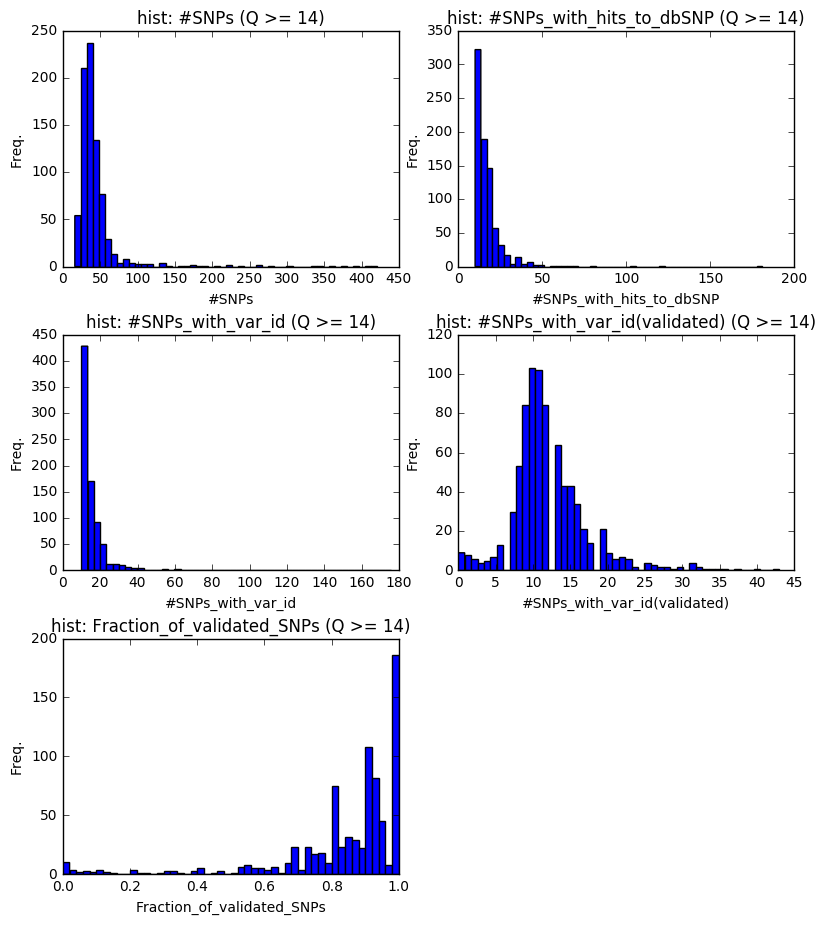

In [7]:
stats = pd.read_csv(snps_stats, sep = '\t')
stats['Fraction_of_validated_SNPs'] = 1.0 * stats['#SNPs_with_var_id(validated)'] / stats['#SNPs_with_var_id']
make_plots(df=stats, title_tail='(Q >= 14)', 
                 filename = '{tmp}/{head}.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats)))
print '{tmp}/{head}.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats))

In [8]:
!cp $JOB_TMP/*.png /home/ytanigaw/projects/nanopore/scripts/20170111/

In [9]:
!cp $JOB_TMP/*.png /share/PI/mrivas/data/nanopore-wgs-consortium/